# Data Description:

The task is to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset. This dataset includes details of applicants who have applied for loan. The dataset consists of 12 Dependent Variables and an Independent Variable.

Independent Variables are Loan_ID, Gender, Married, Dependents, Education, Self_Employed, ApplicantIncome, CoapplicantIncome, Loan_Amount, Loan_Amount_Term, Credit History, Property_Area

Dependent Variable: Loan_Status



# Importing the Dataset

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Importing Dataset
df=pd.read_csv('loan_prediction.csv')
#Visualizing dataset
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


We have 614 rows and 13 columns in our dataset.

In [21]:
#Checking columns in our dataset
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

These are the above columns present in our dataset which also consists of the Target Variable.

# Checking Null Values & Resolving Them

In [8]:
#Checking Null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

We can see there are Null Values in few columns of our dataset. To fill Null Values of Nominal data such as Gender, Married, Dependents, Self_Employed & Credit_History we will use 'most frequent' strategy and to fill null values of continuous data such as LoanAmount & Loan_Amount_Term we will use mean strategy.


In [11]:
#Treating null Values of categorical data
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy='most_frequent')

df['Gender']=imp.fit_transform(df['Gender'].values.reshape(-1,1))
df['Married']=imp.fit_transform(df['Married'].values.reshape(-1,1))
df['Dependents']=imp.fit_transform(df['Dependents'].values.reshape(-1,1))
df['Self_Employed']=imp.fit_transform(df['Self_Employed'].values.reshape(-1,1))
df['Credit_History']=imp.fit_transform(df['Credit_History'].values.reshape(-1,1))


df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


From the above information, we can see that the categorical columns of the dataset are treated. Now we will treat the columns having continuous values.

In [15]:
#treating null values of continuous data
from sklearn.preprocessing import Imputer
import warnings
warnings.filterwarnings('ignore')
imp=Imputer(missing_values='NaN',strategy='mean')
df['LoanAmount']=imp.fit_transform(df['LoanAmount'].values.reshape(-1,1))
df['Loan_Amount_Term']=imp.fit_transform(df['Loan_Amount_Term'].values.reshape(-1,1))


In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


We have finally treated all the Null Values found in our data set. Let us again check the number of null values present in our data to verify.

In [17]:
#Checking null values again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

We can see that we have treated all the Null Values in out dataset.

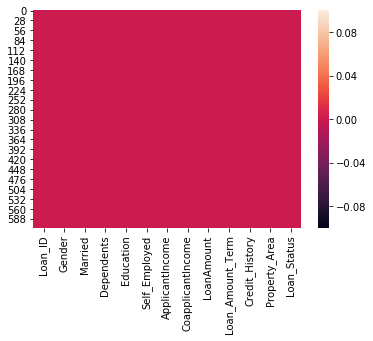

In [19]:
#Visualizing null values using heatmap
import seaborn as sns
sns.heatmap(df.isnull())

 As we don't find any Null Values in our data, we can proceed forward visualizing it.

# Making DataFrame for Nominal Data 

In [53]:
#Copying nominal variables into a new dataframe
df_nominal=df[['Gender', 'Married', 'Dependents', 'Education','Self_Employed','Credit_History','Loan_Amount_Term', 'Property_Area', 'Loan_Status']].copy()

In [54]:
#Checking columns of new nominal dataframe created
df_nominal.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Loan_Amount_Term', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [55]:
#Checking shape of new nominal dataframe created
df_nominal.shape

(614, 9)

The newly created nominal DataFrame consists of 9 columns which only consists of the categorical data.

# Visualization Of Data

For the nominal categorical data we will use countplot as it will gives frequency of the columns.

In [26]:
#Importing Libraries for Visualization
import seaborn as sns
import matplotlib.pyplot as plt

Male      502
Female    112
Name: Gender, dtype: int64


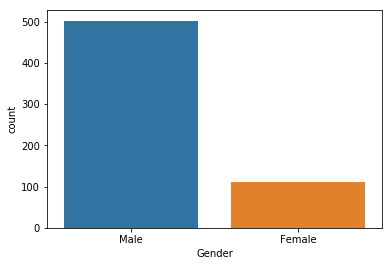

In [27]:
#Using countplot for nominal data
ab=sns.countplot(x='Gender', data=df_nominal)
print(df_nominal['Gender'].value_counts())

There are around 500 male applicants and only 112 female applicants applied for Loan.

Yes    401
No     213
Name: Married, dtype: int64


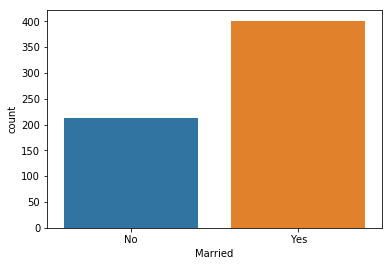

In [28]:
ab=sns.countplot(x='Married', data=df_nominal)
print(df_nominal['Married'].value_counts())

More than 400 loan applicant people are Married and only 213 are unmarried.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


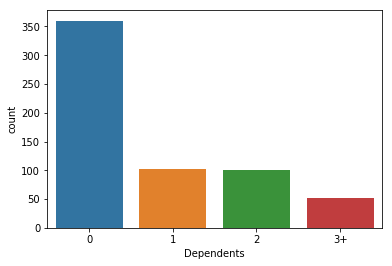

In [29]:
ab=sns.countplot(x='Dependents', data=df_nominal)
print(df_nominal['Dependents'].value_counts())

This column tells us about how many dependents do the loan applicants have. Majority of the people do not have any dependent i.e. 360, 102 have 1 dependent, 101 have 2 dependents, 51 of the more than 3 dependents.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


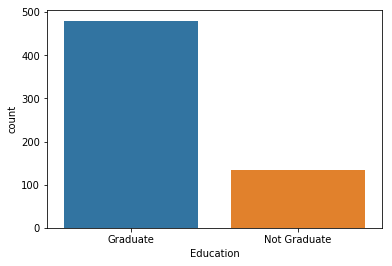

In [30]:
ab=sns.countplot(x='Education', data=df_nominal)
print(df_nominal['Education'].value_counts())

Maximum people from the loan application file are Graduated i.e. 480 of them, but 134 are not Graduated.

No     532
Yes     82
Name: Self_Employed, dtype: int64


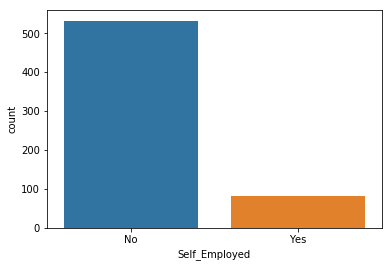

In [31]:
ab=sns.countplot(x='Self_Employed', data=df_nominal)
print(df_nominal['Self_Employed'].value_counts())

Hardly few people are Self Employed i.e. 82 people, 532 are not Self Employed and are working under some Organization.

1.0    525
0.0     89
Name: Credit_History, dtype: int64


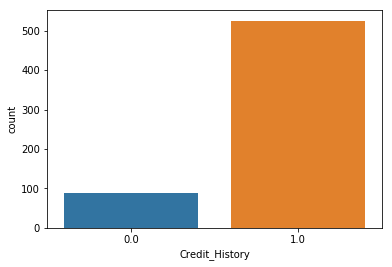

In [32]:
ab=sns.countplot(x='Credit_History', data=df_nominal)
print(df_nominal['Credit_History'].value_counts())

525 people have a Credit History and only 89 of them don't. Majority have a Credit History.

360.0    512
180.0     44
480.0     15
342.0     14
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


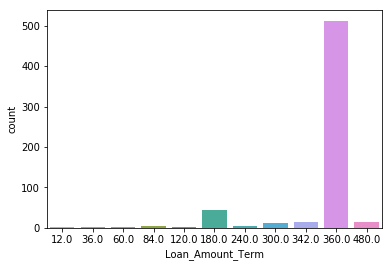

In [56]:
ab=sns.countplot(x='Loan_Amount_Term', data=df_nominal)
print(df_nominal['Loan_Amount_Term'].value_counts())

512 people have the Loan Amount Term 360 which is like the majority of the people. This is the highest Loan Amount Term in our dataset. The minimum Loan Amount Term is 12 which only 1 person has it.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


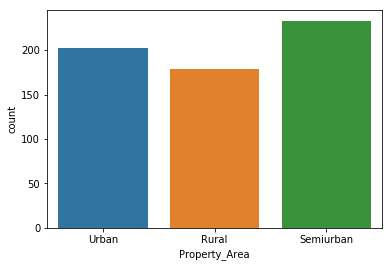

In [33]:
ab=sns.countplot(x='Property_Area', data=df_nominal)
print(df_nominal['Property_Area'].value_counts())

Maximum(233) people have a Property Area in a SemiUrban Place. 202 of them own it in Urban Area and 179 own in the Rural Area.

Y    422
N    192
Name: Loan_Status, dtype: int64


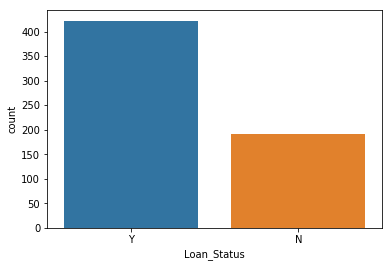

In [34]:
ab=sns.countplot(x='Loan_Status', data=df_nominal)
print(df_nominal['Loan_Status'].value_counts())

Maximum People's Loan has been Accepted i.e. 422 of them and only 192 people's Loan is not Accepted.

 
# Making DataFrame of the Continuous type of Values

In [42]:
#Copying our continuous data into a new dataframe
df_continuous=df[['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']].copy()

In [43]:
#Checking columns of Continuous Variables
df_continuous.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term'],
      dtype='object')

In [44]:
#Checking shape of newly created dataframe
df_continuous.shape

(614, 4)

The Continuous DataFrame consists of 4 columns.

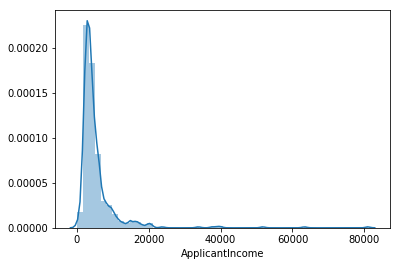

In [49]:
#Visualizing using distplot to check distribution of data
import seaborn as sns
sns.distplot(df['ApplicantIncome'],kde=True)

Majority of the people have their income below 20000. Hardly few people earn more than 20000.

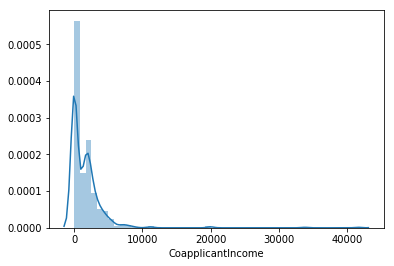

In [50]:
sns.distplot(df['CoapplicantIncome'],kde=True)

Majority of the income of the Co Applicants is below 10000 and hardly few of the Co Applicants have it above 10000.

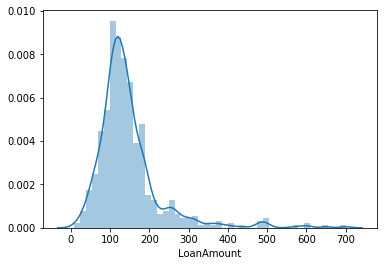

In [51]:
sns.distplot(df['LoanAmount'],kde=True)

The Loan Amount given to the people lies between the range 0 and 700. The Loan Amount of Maximum people is between 0 to 200.

# Relationship Between Categorical and Continuous Data

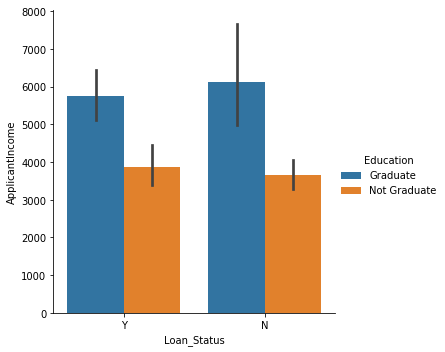

In [59]:
#set up a category plot
g=sns.catplot(x='Loan_Status',y='ApplicantIncome',hue='Education',data=df,kind='bar')
plt.show()

The Applicant's Income of a Graduate who's Loan Status is 'Yes' is around 5800.

The Applicant's Income of a Graduate who's Loan Status is 'No' is more than 6000.

The Applicant's Income of a  Non Graduate who's Loan Status is 'Yes' is 3900.

The Applicant's Income of a  Non Graduate who's Loan Status is 'No' is 3700.

Hence from the above graph we can say that People who are Graduate Earn More. But There is no much relation of Education and Applicant's Income with that of Loan Status.


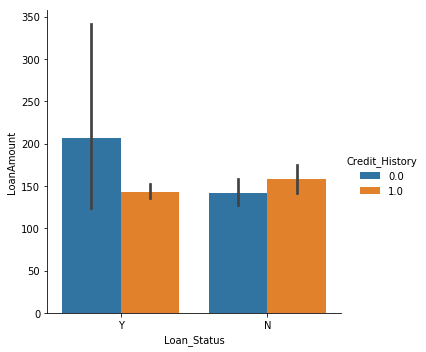

In [60]:
g=sns.catplot(x='Loan_Status',y='LoanAmount',hue='Credit_History',data=df,kind='bar')
plt.show()

We can Observe that peole who have 0 Credit history has got a maximum Loan Amount and Majority  of them with this combination have their Loan Status Accepted. Hence we can see Credit History has a huge impact on the Acceptance of loan Status.

# Encoding Of DataFrame

In [61]:
#Checking data type of each column
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

As we can see many of our columns have object datatype. Hence, we will have to convert them into continuous values in order to Train a Machine Learning Model.

In [62]:
#Importing library for encoding and creating instance for the same 
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()

In [63]:
#Converting object datatype into float values
for i in df.columns:
    if df[i].dtypes=='object':
        df[i]=enc.fit_transform(df[i].values.reshape(-1,1))

In [64]:
#Verifying Conversion 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.0,1.0,0.0,0.0,0.0,0.0,5849,0.0,146.412162,360.0,1.0,2.0,1.0
1,1.0,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.000000,360.0,1.0,0.0,0.0
2,2.0,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.000000,360.0,1.0,2.0,1.0
3,3.0,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.000000,360.0,1.0,2.0,1.0
4,4.0,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.000000,360.0,1.0,2.0,1.0


Here we can see that our categorical coulmns have been converted into float data types.

# Describe Data

In [65]:
#Defining Shape
df.shape

(614, 13)

We have 614 rows and 13 columns including the Target variable in our dataset.

In [66]:
#Getting data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null float64
Gender               614 non-null float64
Married              614 non-null float64
Dependents           614 non-null float64
Education            614 non-null float64
Self_Employed        614 non-null float64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null float64
Loan_Status          614 non-null float64
dtypes: float64(12), int64(1)
memory usage: 62.4 KB


As we have no Null Values and our data consists of float and int Data types, we can try understanding the data by describing it.

In [67]:
#Describing mean, median, min, max values of data
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,146.412162,342.000000,0.855049,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.037468,64.372489,0.352339,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,1.000000


Observation:

We can observe that the standard deviation of initial columns are not huge but the values of columns like ApplicantIncome,CoApplicantIncome and so on is widely Deviated which also shows the possibility of Skewness in Data.

Looking at the min & max values of our dataset, we can also see the possibility of having outliers in our data.


# Correlation of Columns with the Target Variable

In [68]:
df.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974


Our dataset consists of both positive & Negative Correlations

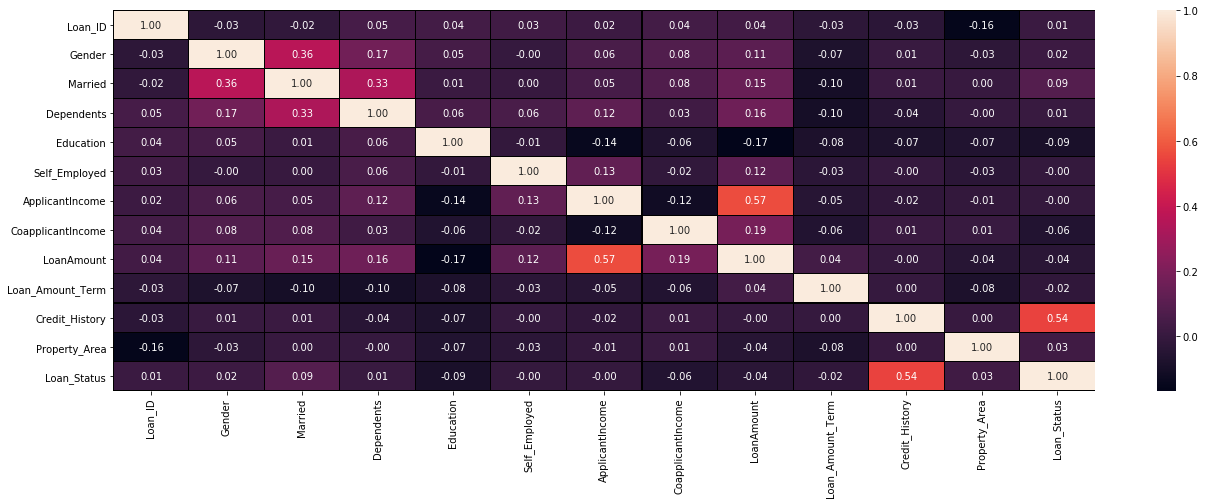

In [69]:
#Plotting correlation of input features with the target Variable
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

Observations:
    
The most positively correlated variable with the target variable is the Credit History.

The most negatively correlated variable with the target variable is Education.

We can see that Self Employed and Applicant's Income does not show much correlation with the Target Variable.


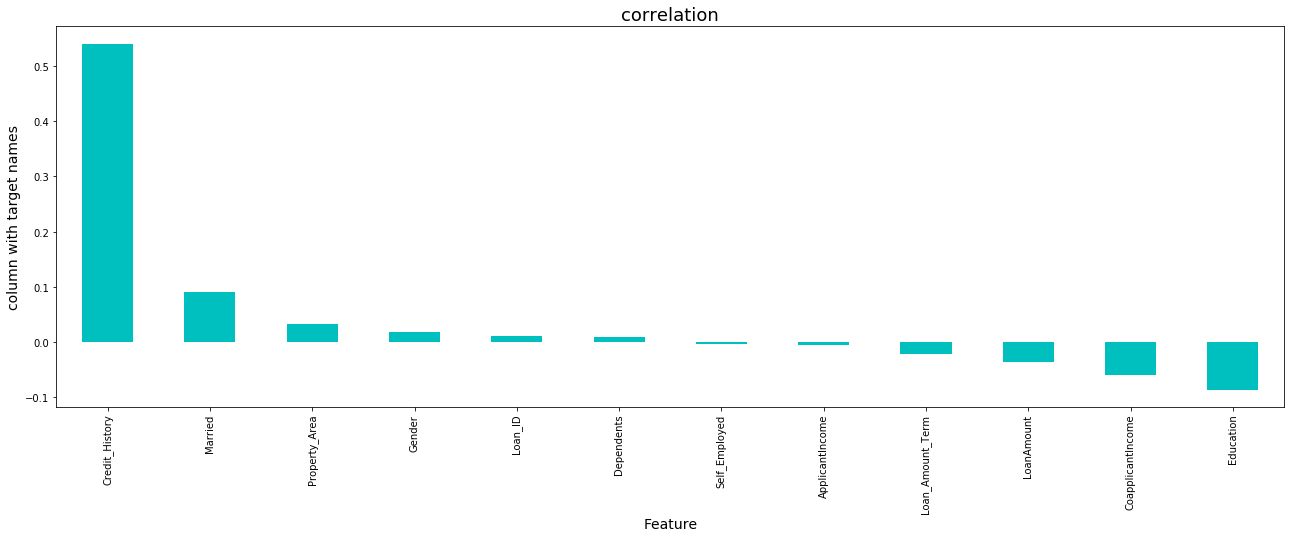

In [71]:
#Plotting Correlation in order with the target variable
plt.figure(figsize=(22,7))
df.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

The positively correlated columns with the Target Variable are Credit History, Married, Property Area, Gender, Loan Id & Dependents.

# Checking Skewness

In [72]:
df.skew()

Loan_ID              0.000000
Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.726601
Loan_Amount_Term    -2.389680
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

Keeping threshold +/-0.5 as the range for skewness, we can see skewness in our Data. Hence, we will check outliers and resolve them.

# Checking Outliers

Loan_ID                  AxesSubplot(0.125,0.71587;0.0824468x0.16413)
Gender                AxesSubplot(0.223936,0.71587;0.0824468x0.16413)
Married               AxesSubplot(0.322872,0.71587;0.0824468x0.16413)
Dependents            AxesSubplot(0.421809,0.71587;0.0824468x0.16413)
Education             AxesSubplot(0.520745,0.71587;0.0824468x0.16413)
Self_Employed         AxesSubplot(0.619681,0.71587;0.0824468x0.16413)
ApplicantIncome       AxesSubplot(0.718617,0.71587;0.0824468x0.16413)
CoapplicantIncome     AxesSubplot(0.817553,0.71587;0.0824468x0.16413)
LoanAmount              AxesSubplot(0.125,0.518913;0.0824468x0.16413)
Loan_Amount_Term     AxesSubplot(0.223936,0.518913;0.0824468x0.16413)
Credit_History       AxesSubplot(0.322872,0.518913;0.0824468x0.16413)
Property_Area        AxesSubplot(0.421809,0.518913;0.0824468x0.16413)
Loan_Status          AxesSubplot(0.520745,0.518913;0.0824468x0.16413)
dtype: object

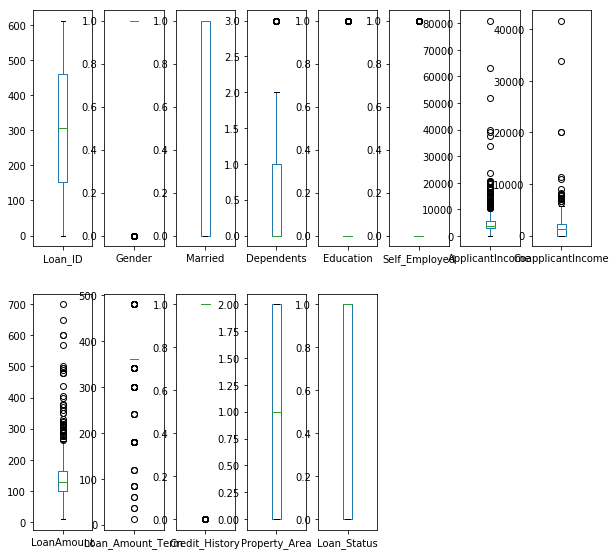

In [73]:
#Multivariate analysis to check outliers of all columns
df.plot(kind='box',subplots=True,layout=(4,8),figsize=(10,20))

We can see a few outliers in our continuous type of variables. Hence, we will resolve these outliers.

# Resolving Outliers


In [74]:
#removing outliers
from scipy.stats import zscore 
z=np.abs(zscore(df))
z

array([[1.72923217, 0.47234264, 1.37208932, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.31851281,
        1.48253724],
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [1.71794844, 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.7235903 , 0.47234264, 0.72881553, ..., 0.41173269, 1.22329839,
        0.67451931],
       [1.72923217, 2.11710719, 1.37208932, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [75]:
#Setting threshold values to remove outliers
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [77]:
#Removing all values more than 3(threshold value)
df_new=df[(z<3).all(axis=1)]

# Calculating Data Loss

In [79]:
#Checking shape before removing outliers
df.shape

(614, 13)

In [80]:
#Checking shape after removing outliers
df_new.shape

(577, 13)

In [123]:
#Using formula to calculate data loss
data_loss=((614-577)/614)*100

In [124]:
data_loss

6.026058631921824

The data lost is 6.02% which is not a huge data loss. Hence, we can proceed.

# Separating the Columns into x & y

In [84]:
#Creating x & y columns 
x=df_new.drop('Loan_Status',axis=1)
y=df_new['Loan_Status']

We have separated our input features and target variable into x & y respectively.

# Transforming Data to reduce Skewness

In [85]:
#Using power transform to remove skewness
from sklearn.preprocessing import power_transform
import warnings
warnings.filterwarnings('ignore')
x=power_transform(x,method='yeo-johnson')
x

array([[-2.15916611,  0.47713685, -1.36251079, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [-2.13342327,  0.47713685,  0.73393914, ...,  0.14260892,
         0.41851254, -1.34019905],
       [-2.11139231,  0.47713685,  0.73393914, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       ...,
       [ 1.55825237,  0.47713685,  0.73393914, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [ 1.56257804,  0.47713685,  0.73393914, ...,  0.14260892,
         0.41851254,  1.1948064 ],
       [ 1.56690162, -2.09583477, -1.36251079, ...,  0.14260892,
        -2.38941464,  0.01546372]])

# Scaling Data Using Min-Max Scaler


We do scaling to transform our data into a particular range so that ML algorithm can train our Model with ease.

In [86]:
#Importing libraries for Scaling 
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')

In [87]:
#define min max scaler
mms=MinMaxScaler()
# transform data
ab=mms.fit_transform(df)
print(ab)

[[0.         1.         0.         ... 1.         1.         1.        ]
 [0.00163132 1.         1.         ... 1.         0.         0.        ]
 [0.00326264 1.         1.         ... 1.         1.         1.        ]
 ...
 [0.99673736 1.         1.         ... 1.         1.         1.        ]
 [0.99836868 1.         1.         ... 1.         1.         1.        ]
 [1.         0.         0.         ... 0.         0.5        0.        ]]


Since our Target Variable has binary values, we use Classification Algorithms.

# Model Building

In [88]:
#importing Libraries for buiding model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [89]:
#Code for finding best random state
lr=LogisticRegression()
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f'At random state {i}, the training accuracy is: {accuracy_score(y_train,pred_train)}')
    print(f'At random state {i}, the testing accuracy is: {accuracy_score(y_test,pred_test)}')
    print("\n")

At random state 0, the training accuracy is: 0.824295010845987
At random state 0, the testing accuracy is: 0.7931034482758621


At random state 1, the training accuracy is: 0.8156182212581344
At random state 1, the testing accuracy is: 0.8275862068965517


At random state 2, the training accuracy is: 0.8199566160520607
At random state 2, the testing accuracy is: 0.8103448275862069


At random state 3, the training accuracy is: 0.824295010845987
At random state 3, the testing accuracy is: 0.7931034482758621


At random state 4, the training accuracy is: 0.824295010845987
At random state 4, the testing accuracy is: 0.8017241379310345


At random state 5, the training accuracy is: 0.824295010845987
At random state 5, the testing accuracy is: 0.7931034482758621


At random state 6, the training accuracy is: 0.806941431670282
At random state 6, the testing accuracy is: 0.8620689655172413


At random state 7, the training accuracy is: 0.824295010845987
At random state 7, the testing accuracy



At random state 70, the training accuracy is: 0.8394793926247288
At random state 70, the testing accuracy is: 0.7413793103448276


At random state 71, the training accuracy is: 0.8112798264642083
At random state 71, the testing accuracy is: 0.853448275862069


At random state 72, the training accuracy is: 0.8221258134490239
At random state 72, the testing accuracy is: 0.8017241379310345


At random state 73, the training accuracy is: 0.8329718004338394
At random state 73, the testing accuracy is: 0.7672413793103449


At random state 74, the training accuracy is: 0.8286334056399133
At random state 74, the testing accuracy is: 0.7844827586206896


At random state 75, the training accuracy is: 0.824295010845987
At random state 75, the testing accuracy is: 0.7931034482758621


At random state 76, the training accuracy is: 0.8286334056399133
At random state 76, the testing accuracy is: 0.7844827586206896


At random state 77, the training accuracy is: 0.8264642082429501
At random state 77

At random state 144, the training accuracy is: 0.8308026030368764
At random state 144, the testing accuracy is: 0.7758620689655172


At random state 145, the training accuracy is: 0.824295010845987
At random state 145, the testing accuracy is: 0.8017241379310345


At random state 146, the training accuracy is: 0.8329718004338394
At random state 146, the testing accuracy is: 0.7586206896551724


At random state 147, the training accuracy is: 0.8091106290672451
At random state 147, the testing accuracy is: 0.853448275862069


At random state 148, the training accuracy is: 0.8156182212581344
At random state 148, the testing accuracy is: 0.8275862068965517


At random state 149, the training accuracy is: 0.8394793926247288
At random state 149, the testing accuracy is: 0.7586206896551724


At random state 150, the training accuracy is: 0.8112798264642083
At random state 150, the testing accuracy is: 0.853448275862069


At random state 151, the training accuracy is: 0.8156182212581344
At ran

At random state 12, we get our best training accuracy at 79.60% and testing accuracy at 90.51%

In [90]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=12)

We split our data into Training and Testing giving 80% data for Training and 20% for Testing at best random state 12. We will use different algorithms for comparing accuracies and attain the best model. We will compare Logitic Regression and Decision Tree Classifier in this case.

In [91]:
#Code for Logistic regression
lr=LogisticRegression()
lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print(accuracy_score(y_test,predlr))
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

0.905511811023622
[[19 11]
 [ 1 96]]
              precision    recall  f1-score   support

         0.0       0.95      0.63      0.76        30
         1.0       0.90      0.99      0.94        97

   micro avg       0.91      0.91      0.91       127
   macro avg       0.92      0.81      0.85       127
weighted avg       0.91      0.91      0.90       127



In [92]:
#Code for Decision Tree Classifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7244094488188977
[[18 12]
 [23 74]]
              precision    recall  f1-score   support

         0.0       0.44      0.60      0.51        30
         1.0       0.86      0.76      0.81        97

   micro avg       0.72      0.72      0.72       127
   macro avg       0.65      0.68      0.66       127
weighted avg       0.76      0.72      0.74       127



We get accuracy 90.51% for Logistic Regression and 72.44% for Decision Tree.

We might attain this accuracy due to Overfitting/Underfitting problems as well. Let's use different Testing Techniques to test accuracy.

# Cross Validation of the Model

Using Cross Validation to check & resolve overfitting and underfitting issues. Here, we are manually changing cv values to find the best accuracy at a particular cv value. 

In [108]:
#Applying cross validation techniques for Logistic Regression
from sklearn.model_selection import cross_val_score
scr=cross_val_score(lr,x,y,cv=9)
print("Cross Validation score of LogisticRegression model: ",scr.mean())

Cross Validation score of LogisticRegression model:  0.8198391500474833


In [109]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(dt,x,y,cv=9)
print("Cross Validation score of DecisionTreeClassifier model: ",scr.mean())

Cross Validation score of DecisionTreeClassifier model:  0.6886056844390178


The cross Validation score for Logistic Regression is 81.98% and the cv score for Decision Tree Classifier is 68.86%

The difference between the accuracy score and cv score of Logistic Regression is 8.17 and that for Decision Tree Classifier is 3.14.

Hence, DecisionTreeClassifier is giving us better accuracy than that of Logistic Regreesion. So we proceed using Decision Tree for our project.

# Hyper Parameter Tuning


In [110]:
#Importing Libarary for Hyper Parameter Tuning
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [114]:
dtc=DecisionTreeClassifier()
grid_param={'criterion':['gini','entropy'],'max_depth':np.arange(2,15)}

gd_sr=GridSearchCV(estimator=dtc,param_grid=grid_param,scoring='accuracy',cv=9)

gd_sr.fit(x,y)

best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

{'criterion': 'gini', 'max_depth': 2}
0.75736568457539


After applying Hyper Parameter Tuning to our Decision Tree, we get accuracy score as 75.73% with criterion 'gini' and max depth 2.

# Ensemble Techniques

In [121]:
#Testing accuracy using RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

rf=RandomForestClassifier(n_estimators=100,random_state=12)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.8661417322834646
[[19 11]
 [ 6 91]]
              precision    recall  f1-score   support

         0.0       0.76      0.63      0.69        30
         1.0       0.89      0.94      0.91        97

   micro avg       0.87      0.87      0.87       127
   macro avg       0.83      0.79      0.80       127
weighted avg       0.86      0.87      0.86       127



We are able to achieve our best accuracy at 86.61% using the Ensemble Technique i.e. Random Forest Classifier. Hence we save the model.

# Saving The Best Model

In [122]:
import pickle
filename='Loan_Status.pkl'
pickle.dump(rf,open(filename,'wb'))